#Ch05 先動手實作！５ 行程式體驗神經網路模型

###5.2.3 在 Colab 讀入 MNIST 資料集

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
np.set_printoptions(linewidth=np.inf)
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

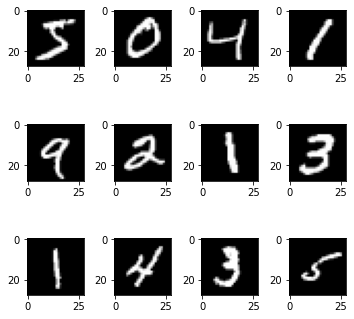

In [7]:
plt.figure(figsize=(5,5)) 
for k in range(12): 
  plt.subplot(3, 4, k+1) 
  plt.imshow(X_train[k], cmap='gray')
plt.tight_layout()
plt.show()


###5.2.4 資料預處理

In [8]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

In [9]:
X_train /= 255
X_test /= 255

In [10]:
X_train[0] 

array([0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.       

In [11]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

###5.2.5 開始建立神經網路模型！5 行程式就搞定！

In [13]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784, )))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='mean_squared_error', 
              optimizer=optimizers.SGD(learning_rate=0.01), 
              metrics=['accuracy'])

###5.2.6 訓練神經網路模型

In [15]:
model.fit(X_train,y_train, 
          batch_size=128, 
          epochs=200, 
          verbose=1, 
          validation_data=(X_test, y_test))
#註：由於神經網路的初始權重參數是隨機設定的, 參雜了隨機性, 因此底下 (或您重跑一次) 的結果會與書中有小差異

Epoch 1/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0919 - accuracy: 0.1152 - val_loss: 0.0915 - val_accuracy: 0.1232
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0912 - accuracy: 0.1205 - val_loss: 0.0908 - val_accuracy: 0.1360
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.1398 - val_loss: 0.0903 - val_accuracy: 0.1637
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.1715 - val_loss: 0.0898 - val_accuracy: 0.1908
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0897 - accuracy: 0.1912 - val_loss: 0.0894 - val_accuracy: 0.2090
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.2045 - val_loss: 0.0890 - val_accuracy: 0.2212
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0889 - accuracy: 0.2146 - val_loss: 0.0886 - val_accuracy: 0.2330